In [332]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import csv
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

seed=123456
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading

Load the dataset to csv

In [333]:
import os
path=os.getcwd()+"\\a1_dataset.csv"
df=pd.read_csv(path)

## 2. Explorative analysis

#### Visualize the first 5 entries of the dataset

In [334]:
first5=df[:5]
print(first5)

   battery_power blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842    N          2.2       NaN   1       0           7    0.6   
1           1021    Y          0.5       1.0   0       1          53    0.7   
2            563    Y          0.5       1.0   2       1          41    0.9   
3            615    Y          2.5       NaN   0       0          10    0.8   
4           1821    Y          1.2       NaN  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen wifi  price_range  
0    

#### Check for null values

In [335]:
notnull=df.notnull()
print(notnull)
#false = null values

      battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0              True  True         True     False  True    True        True   
1              True  True         True      True  True    True        True   
2              True  True         True      True  True    True        True   
3              True  True         True     False  True    True        True   
4              True  True         True     False  True    True        True   
5              True  True         True      True  True    True        True   
6              True  True         True     False  True    True        True   
7              True  True         True      True  True    True        True   
8              True  True         True     False  True    True        True   
9              True  True         True      True  True    True        True   
10             True  True         True      True  True    True        True   
11             True  True         True     False  True    True  

#### Show info about the dataframe: columns, data types, non-null values and memory footprint
Use pandas.DataFrame.info

In [336]:
infos=df.info()
print(infos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       1019 non-null   float64
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Generate descriptive statistics
Use pandas.DataFrame.describe

In [337]:
stats=df.describe()
print(stats)

       battery_power  clock_speed  dual_sim           fc       four_g  \
count    2000.000000  2000.000000    1019.0  2000.000000  2000.000000   
mean     1238.518500     1.522250       1.0     4.309500     0.521500   
std       439.418206     0.816004       0.0     4.341444     0.499662   
min       501.000000     0.500000       1.0     0.000000     0.000000   
25%       851.750000     0.700000       1.0     1.000000     0.000000   
50%      1226.000000     1.500000       1.0     3.000000     1.000000   
75%      1615.250000     2.200000       1.0     7.000000     1.000000   
max      1998.000000     3.000000       1.0    19.000000     1.000000   

        int_memory        m_dep    mobile_wt      n_cores           pc  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     32.046500     0.501750   140.249000     4.520500     9.916500   
std      18.145715     0.288416    35.399655     2.287837     6.064315   
min       2.000000     0.100000    80.000000  

#### Show box plots of features distribution
Use pandas.DataFrame.plot

<AxesSubplot:>

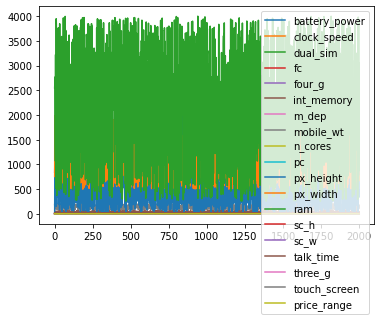

In [338]:
df.plot()

#### Check whether the dataset is balanced

## 3. Data manipulation

#### Fill null values of 'dual_sim' with 0 and check it

In [339]:
df=df.fillna(0)
print(df)

      battery_power blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842    N          2.2       0.0   1       0           7   
1              1021    Y          0.5       1.0   0       1          53   
2               563    Y          0.5       1.0   2       1          41   
3               615    Y          2.5       0.0   0       0          10   
4              1821    Y          1.2       0.0  13       1          44   
5              1859    N          0.5       1.0   3       0          22   
6              1821    N          1.7       0.0   4       1          10   
7              1954    N          0.5       1.0   0       0          24   
8              1445    Y          0.5       0.0   0       0          53   
9               509    Y          0.6       1.0   2       1           9   
10              769    Y          2.9       1.0   0       0           9   
11             1520    Y          2.2       0.0   5       1          33   
12             1815    N 

#### Performs the mapping {Y : 1 ; N : 0} to columns 'blue' and 'wifi'
Use pandas.DataFrame.apply()

In [340]:
def fun(x):
    if x=='Y':
        return 1
    if x=='N':
        return 0
    return x

df['blue']=df['blue'].apply(fun)
df['wifi']=df['wifi'].apply(fun)

print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2       0.0   1       0           7   
1              1021     1          0.5       1.0   0       1          53   
2               563     1          0.5       1.0   2       1          41   
3               615     1          2.5       0.0   0       0          10   
4              1821     1          1.2       0.0  13       1          44   
5              1859     0          0.5       1.0   3       0          22   
6              1821     0          1.7       0.0   4       1          10   
7              1954     0          0.5       1.0   0       0          24   
8              1445     1          0.5       0.0   0       0          53   
9               509     1          0.6       1.0   2       1           9   
10              769     1          2.9       1.0   0       0           9   
11             1520     1          2.2       0.0   5       1          33   
12          

## 4. Correlation
Calculates the correlation of features and represents it via a heatmap.
Use pandas.DataFrame.corr

In [341]:
df.corr()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


## 5. Statistical analysis of features through graphic libraries

#### Number of devices for 'price_range' 

In [342]:
d=df.groupby('price_range')['fc'].count()
print(d)

price_range
0    500
1    500
2    500
3    500
Name: fc, dtype: int64


#### Column values distribution by target (boxplot)

AxesSubplot(0.125,0.125;0.775x0.755)


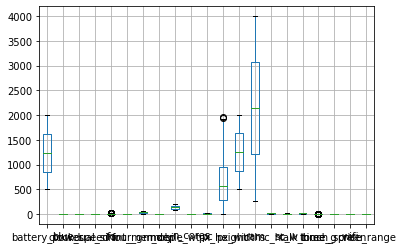

In [343]:
t=df.boxplot()
print(t)

#### Graphically represents the relationship between 'px_width' and 'px_height'

<AxesSubplot:>

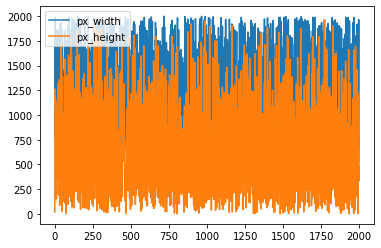

In [344]:
df[['px_width','px_height']].plot()

#### Graphically represents the relationship between 'pc' and 'fc'

<AxesSubplot:>

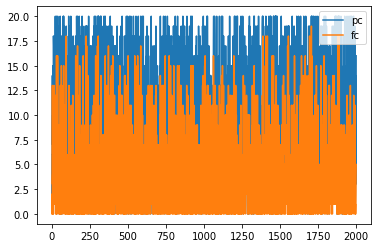

In [345]:
df[['pc','fc']].plot()

#### Display the number of devices for various values of 'n_cores' (bar chart)

<AxesSubplot:xlabel='n_cores'>

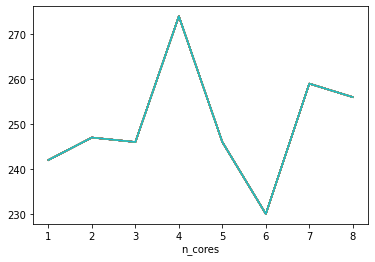

In [346]:
df.groupby('n_cores').count().plot(legend=False)

#### Calculate the number of devices based on the values of 'four_g' and 'three_g' and represents the numeric (pie chart)
Use pandas.DataFrame.groupby

AxesSubplot(0.260833,0.125;0.503333x0.755)


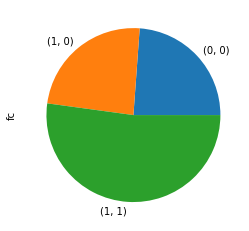

In [347]:
p=df.groupby(['three_g','four_g'])['fc'].count().plot.pie()
print(p)

## 6. Creation of new features

#### Add column 'sc_dim' = 'sc_w' * 'sc_h'

In [348]:
df['sc_dim']= df['sc_w']* df['sc_h']
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2       0.0   1       0           7   
1              1021     1          0.5       1.0   0       1          53   
2               563     1          0.5       1.0   2       1          41   
3               615     1          2.5       0.0   0       0          10   
4              1821     1          1.2       0.0  13       1          44   
5              1859     0          0.5       1.0   3       0          22   
6              1821     0          1.7       0.0   4       1          10   
7              1954     0          0.5       1.0   0       0          24   
8              1445     1          0.5       0.0   0       0          53   
9               509     1          0.6       1.0   2       1           9   
10              769     1          2.9       1.0   0       0           9   
11             1520     1          2.2       0.0   5       1          33   
12          

#### Add column ‘px_dim’ = 'px_width' * 'px_height'

In [349]:
df['px_dim']= df['px_width']* df['px_height']
print(df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'sc_dim', 'px_dim'],
      dtype='object')


#### Add column ‘3g_4g’

In [350]:
# Map 3g and 4g in a single variable, assuming the following values:
# 0-> 3G:n 4G:n
# 1-> 3G:s 4G:n
# 2-> 3G:n 4G:s
# 3-> 3G:s 4G:s
def fun(a,b):
    if a==0 and b==0:
        return 0
    if  a==1 and b==0:
        return 1
    if  a==0 and b==1:
        return 2
    if  a==1 and b==1:
        return 3

df['3g_4g']=df[['three_g','four_g']].apply(lambda x: fun(x['three_g'], x['four_g']), axis=1)


## 7. Dropping features

#### Drop the columns: ‘sc_w’, ‘sc_h’, 'px_width', 'px_height', ‘four_g’, and ‘three_g’

In [351]:
df=df.drop(columns=['sc_w', 'sc_h','px_width','px_height','four_g','three_g'])

print(df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'touch_screen', 'wifi', 'price_range', 'sc_dim', 'px_dim', '3g_4g'],
      dtype='object')


## 8. Analyse correlation on the modified dataset

In [352]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range,sc_dim,px_dim,3g_4g
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,-0.000653,0.052510,-0.010516,-0.008343,0.200723,-0.024589,0.018442,0.015876
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.041177,0.004049,-0.008605,0.036161,-0.009952,0.026351,0.013934,0.010061,-0.021863,0.020573,-0.005565,-0.015513,0.000421
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,0.003443,-0.011432,0.019756,-0.024471,-0.006606,-0.006103,-0.009854,-0.048507
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,0.041072,-0.039404,-0.017117,0.022740,0.017444,-0.015703,-0.017730,-0.002151
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,0.015099,-0.006829,-0.014828,0.020085,0.021998,-0.011437,-0.012337,-0.012185
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.032813,-0.002790,-0.026999,0.006993,0.044435,0.022887,0.015263,0.003622
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,-0.009434,0.017003,-0.002638,-0.028353,0.000853,-0.021453,0.025138,-0.005377
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,-0.002581,0.006209,-0.014368,-0.000409,-0.030302,-0.026375,-0.006036,-0.012247
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,0.004868,0.013148,0.023774,-0.009964,0.004399,0.021618,0.001245,-0.027764
pc,0.031441,-0.009952,-0.005245,-0.017143,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,0.028984,0.014657,-0.008742,0.005389,0.033599,-0.013611,-0.017451,-0.004754


## 9. Split target variable y (‘price_range’) from the other features (x)
Select the label 'price_range' as y and the remaining ones as x

In [353]:
df.head()

newdf=df.set_index('price_range')
newdf.T
newdf.head()


,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,sc_dim,px_dim,3g_4g
price_range,,,,,,,,,,,,,,,,,
1,842,0,2.2,0.0,1,7,0.6,188,2,2,2549,19,0,1,63,15120,0
2,1021,1,0.5,1.0,0,53,0.7,136,3,6,2631,7,1,0,51,1799140,3
2,563,1,0.5,1.0,2,41,0.9,145,5,6,2603,9,1,0,22,2167308,3
2,615,1,2.5,0.0,0,10,0.8,131,6,9,2769,11,0,0,128,2171776,1
1,1821,1,1.2,0.0,13,44,0.6,141,2,14,1411,15,1,0,16,1464096,3


## 10. Normalization

#### Normalize the dataset 
from sklearn.preprocessing import StandardScaler

In [354]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)

#### Visualize using histograms all features distribution before and after normalization
Use pandas.DataFrame.hist

<AxesSubplot:ylabel='Frequency'>

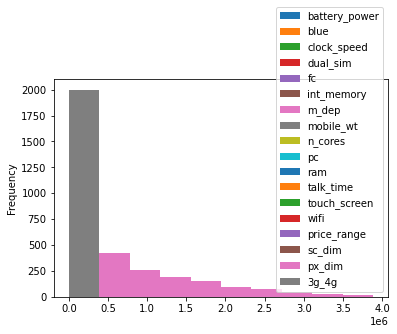

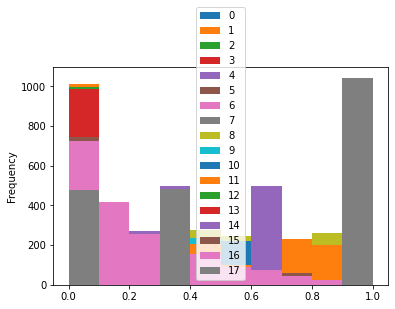

In [355]:
df.plot.hist()
df2.plot.hist()

## 11. Split X (normalized) e y in train and test set with a 70:30 ratio

In [364]:

features = df.columns
X = df.loc[:, features]
y = df.loc[:, ["price_range"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)


## 12. Classification
Using sklearn implement the following classification models

### Decision Tree

In [365]:

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

### Logistic Regression

In [366]:
model =LogisticRegression(fit_intercept=True)
print(model)
model.fit(X, y)

LogisticRegression()


LogisticRegression()

### Support Vector Machines

In [368]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


## 13. Compare the end results by their accuracy

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## (Optional)

## 14. LDA
Use LDA to achieve dimensionality reduction

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Linear Discriminant Analysis

## 15. Classification with feature extraction

### Decision Tree

### Logistic Regression

### Support Vector Machines

## 16. Compare the end results by their accuracy